#### Hello!! This is an ambitious project. I am working with Robert Crump and we will be trying to do some serious math. 



dealing with TXDOT data. here is the TXDOT roadwa inventory - https://gis-txdot.opendata.arcgis.com/datasets/TXDOT::txdot-roadway-inventory/about

and here is the documentation concerning it - https://gis-txdot.opendata.arcgis.com/documents/TXDOT::txdot-roadway-inventory-specifications-2021/explore



In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import h3pandas
#from osgeo import gdal
#from osgeo import ogr


pd.set_option('display.max_columns', None) ### This line makes all the columns display, rather than ellipses shorten

txdot_zipfile = 'C:/Users/aaron/Code/Data/TxDOT_Roadway_Inventory_Travis_County.zip'
hexagon_zipfile = 'C:/Users/aaron/Code/Data/atx_hex.zip'

#data_frame = pd.read_csv(zipfile)

geo_data_frame = gpd.read_file(txdot_zipfile)
#hex_data_frame = gpd.read_file('C:/Users/aaron/Code/Data/atx_hex.shp', SHAPE_RESTORE_SHX = 'Yes')
#hex_data_frame = gpd.read_file(hexagon_zipfile)
#dataset = ogr.Open('C:/Users/aaron/Code/Data/atx_hex.zip')

In [2]:
geo_data_frame = geo_data_frame.dropna(axis=1, how='all') ### drop all columns that are only NAN

In [39]:
crs = geo_data_frame.crs


#crs
#crs_frame = geo_data_frame.to_crs(EPSG = '4326')
crs_frame = geo_data_frame.to_crs('4326')

#type(crs_frame)

centroid_frame = crs_frame#['geometry'].centroid

centroid_frame['geometry'] = centroid_frame['geometry'].centroid

#centroids

C:\Users\aaron\AppData\Local\Temp\ipykernel_22456\3379186737.py:12: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid_frame['geometry'] = centroid_frame['geometry'].centroid


In [3]:
geo_data_frame.head()

,OBJECTID,REC,RIA_RTE_ID,RTE_GRID,GID,FRM_DFO,TO_DFO,C_SEC,CON,SEC,BMP,EMP,HWY,HSYS,HNUM,RDBD_ID,FRM_NBR,FRM_NUM,FRM_DISP,TO_NBR,TO_NUM,TO_DISP,FRM_MKR_DA,TO_MKR_DAT,STE_NAM,DI,CO,CITY,MPA,UAN,UAN_HPMS,RU,MSA_CNTY,MAINT_DIS,MNT_SEC,PBLC_LAND,ADMIN,RDWAY_MAIN,F_SYSTEM,RU_F_SYSTE,SEC_NHS,SEC_NHS_AP,SEC_STR,SEC_TRUNK,SEC_TRK,SEC_HAZ,SEC_EVAC,SEC_NFH,SEC_STM,SEC_TTT,SEC_PARK,TOP100ID,NHFN,HWY_STAT,SPD_MAX,SCHOOL_ZN,TOLL_NM,TOLL_HPMS_,TOLL_FACIL,TOLL_CHRG_,TOLL_LANES,MNGD_LANE_,MNGD_LAN_1,MNGD_LANES,HWY_DES1,ACES_CTRL,BRDG_STRUC,MED_TYPE,MED_WID,NUM_LANES,CLMB_PS_LA,ACCEL_DECE,ROW_MIN,RB_WID,PV_RB_WID,SUR_W,S_TYPE_I,S_WID_I,S_USE_I,S_TYPE_O,S_WID_O,S_USE_O,CURB_L,CURB_R,BASE_TP,SRF_TYPE,SURF_TREAT,SURF_TRE_1,SURF_TRE_2,TRF_STA_ID,ADT_YEAR,ADT_CUR,ADT_ADJ,K_FAC,D_FAC,TRK_AADT_P,PCT_SADT,PCT_CADT,AADT_TRUCK,AADT_SINGL,AADT_COMBI,TRK_DHV_PC,PCT_SDHV,PCT_CDHV,FLEX_ESAL,RIGID_ESAL,ATH_100,ATH_PCT,MOTORCYCLE,HY_1,HY_2,HY_3,HY_4,HY_5,HY_6,HY_7,HY_8,HY_9,DESGN_YR,AADT_DESGN,INCRS_FCTR,INCRS_FC_1,DHV,TRUCK_HY_1,TRUCK_HY_2,TRUCK_HY_3,TRUCK_HY_4,TRUCK_HY_5,TRUCK_HY_6,TRUCK_HY_7,TRUCK_HY_8,TRUCK_HY_9,HPMSID,HP_VOL_GRP,RT_TURN_LA,LT_TURN_LA,LANE_WIDTH,YR_LAST_IM,YR_LAST_CN,LAST_OVRLY,PVMT_THI_1,BASE_THCK,LEN_SEC,LN_MILES,DVMT,DTRKVMT,SHAPE_Leng,geometry
0,260,0,1549145954,153710,1549145954,0.180,0.754,None,None,NaN,NaN,NaN,IH0035,IH,0035,GS,NaN,None,NaN,NaN,None,NaN,NaN,NaN,None,14,227,2100,90,90,4384,4,NaN,NaN,NaN,NaN,NaN,NaN,1,U1,0,NaN,0,0,0,0,0,0,0,0,0,NaN,NaN,6,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,1.0,NaN,None,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,227RP2901L,2022,4029,4029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,4069.0,1614.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.574,0.574,2312.646,NaN,0.008783,"LINESTRING (-97.71111 30.32063, -97.71082 30.3..."
1,343,0,1599255034,154254,1599255034,0.000,0.004,None,None,NaN,NaN,NaN,SH0045,SH,0045,GS,NaN,None,NaN,NaN,None,NaN,NaN,NaN,None,14,227,0,90,90,4384,4,NaN,NaN,NaN,NaN,NaN,NaN,2,U2,0,20210519.0,0,0,0,0,0,0,0,0,0,NaN,NaN,6,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,1.0,NaN,None,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,227RP45105,2022,295,295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,237.0,276.0,116.0,101.0,227.0,247.0,229.0,136.0,150.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004,0.004,1.180,NaN,0.000065,"LINESTRING (-97.73519 30.08429, -97.73525 30.0..."
2,481,0,1599255035,154254,1599255035,0.000,0.359,None,None,NaN,NaN,NaN,SH0045,SH,0045,GS,NaN,None,NaN,NaN,None,NaN,NaN,NaN,None,14,227,0,90,90,4384,4,NaN,NaN,NaN,NaN,NaN,NaN,2,U2,0,NaN,0,0,0,0,0,0,0,0,0,NaN,NaN,6,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,1.0,NaN,None,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,227RP45103,2022,971,971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,513.0,491.0,396.0,470.0,302.0,422.0,340.0,282.0,218.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.359,0.359,348.589,NaN,0.005817,"LINESTRING (-97.72997 30.08174, -97.73004 30.0..."
3,626,0,1599254622,154254,1599254622,0.000,0.774,None,None,NaN,NaN,NaN,SH0045,SH,0045,GS,NaN,None,NaN,NaN,None,NaN,NaN,NaN,None,14,227,32580,90,90,4384,4,NaN,NaN,NaN,NaN,NaN,NaN,2,U2,0,NaN,0,0,0,0,0,0,0,0,0,NaN,NaN,6,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,1.0,NaN,None,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,227DC45130ESFB,2022,7595,7595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,6134.0,4563.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.774,0.774,5878.530,NaN,0.011513,"LINESTRING (-97.59671 30.47555, -97.59616 30.4..."
4,762,0,1549145954,153710,1549145954,0.172,0.1

In [4]:
geo_data_frame['CITY'].value_counts()

2100     15943
0         6160
32580     1215
23030      613
23580      467
26450      445
24210      266
29430      216
21270      188
7670       176
45180      163
3330       158
44080       88
36750       66
36400       65
10170       62
5620        56
13300       55
33210       54
41450       51
44085       41
44610       31
37870       20
47350        1
Name: CITY, dtype: int64

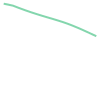

In [5]:
geo_data_frame.iloc[5].geometry

<Axes: >

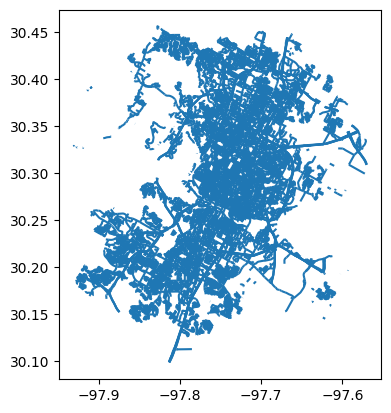

In [6]:
geo_data_frame[geo_data_frame['CITY'] == 2100].plot()

<Axes: >

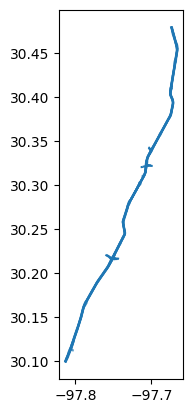

In [7]:
geo_data_frame[geo_data_frame['HWY'] == 'IH0035'].plot()

Text(0.5, 1.0, 'I 35 DVMT')

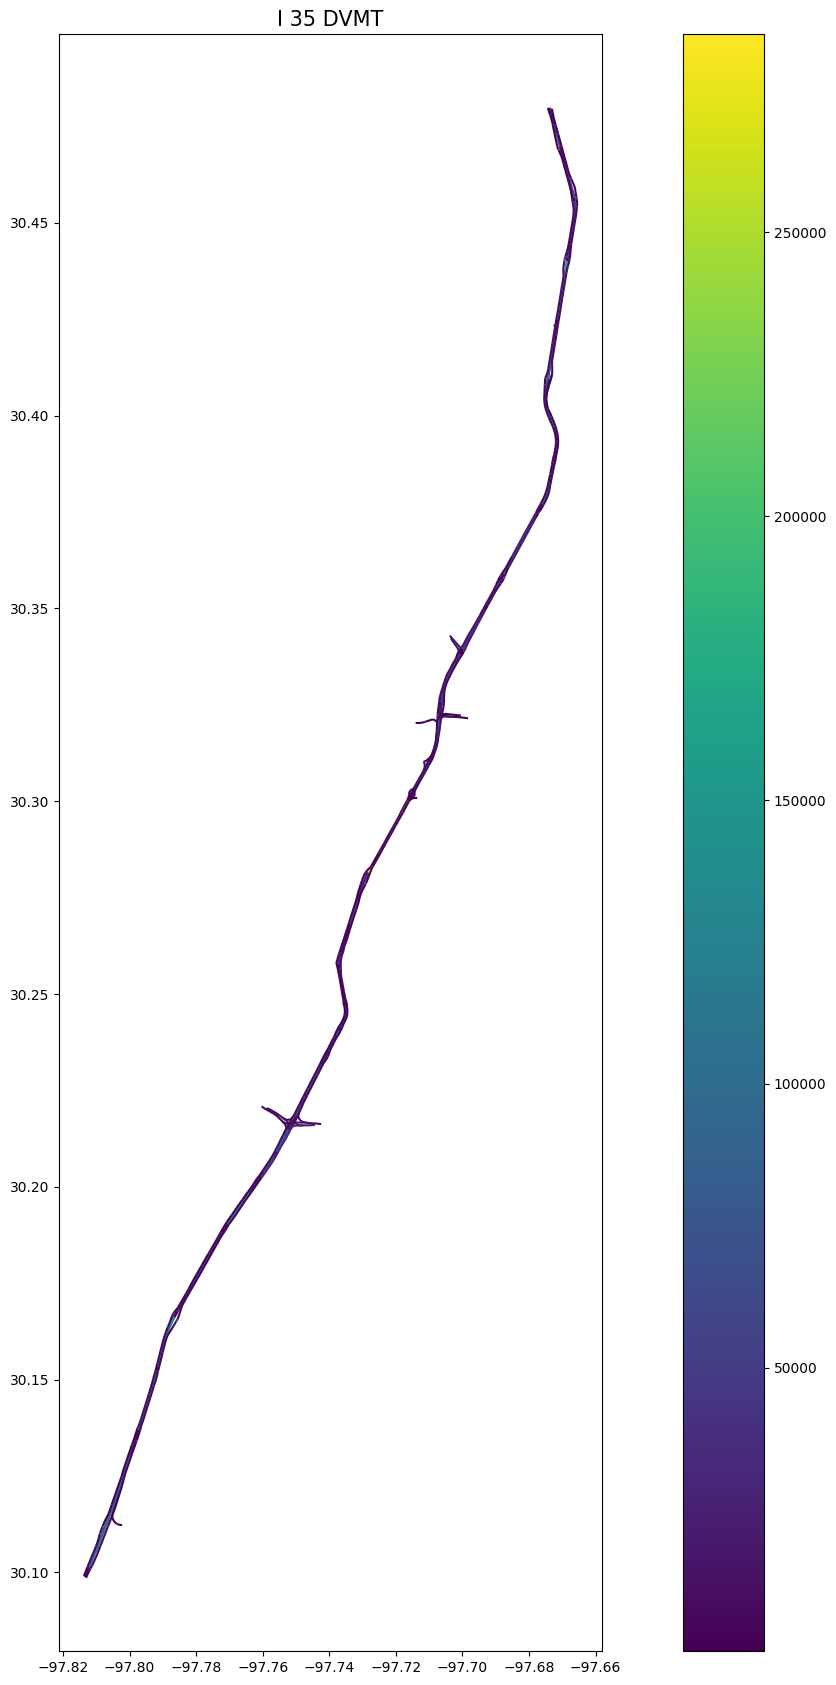

In [8]:
fig, ax = plt.subplots(figsize  = (21, 21))

geo_data_frame[geo_data_frame['HWY'] == 'IH0035'].plot(column = 'DVMT',
                    #cmap = 'magma',
                    legend = True,
                    #norm=mpl.colors.LogNorm(vmin = 0.01, vmax = 100),
                    ax = ax)


ax.ticklabel_format(useOffset=False)

ax.set_title("I 35 DVMT", fontsize=15)

C:\Users\aaron\AppData\Local\Programs\Python\Python310\lib\site-packages\h3pandas\h3pandas.py:498: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .agg(operation)


Text(0.5, 1.0, 'Austin DVMT')

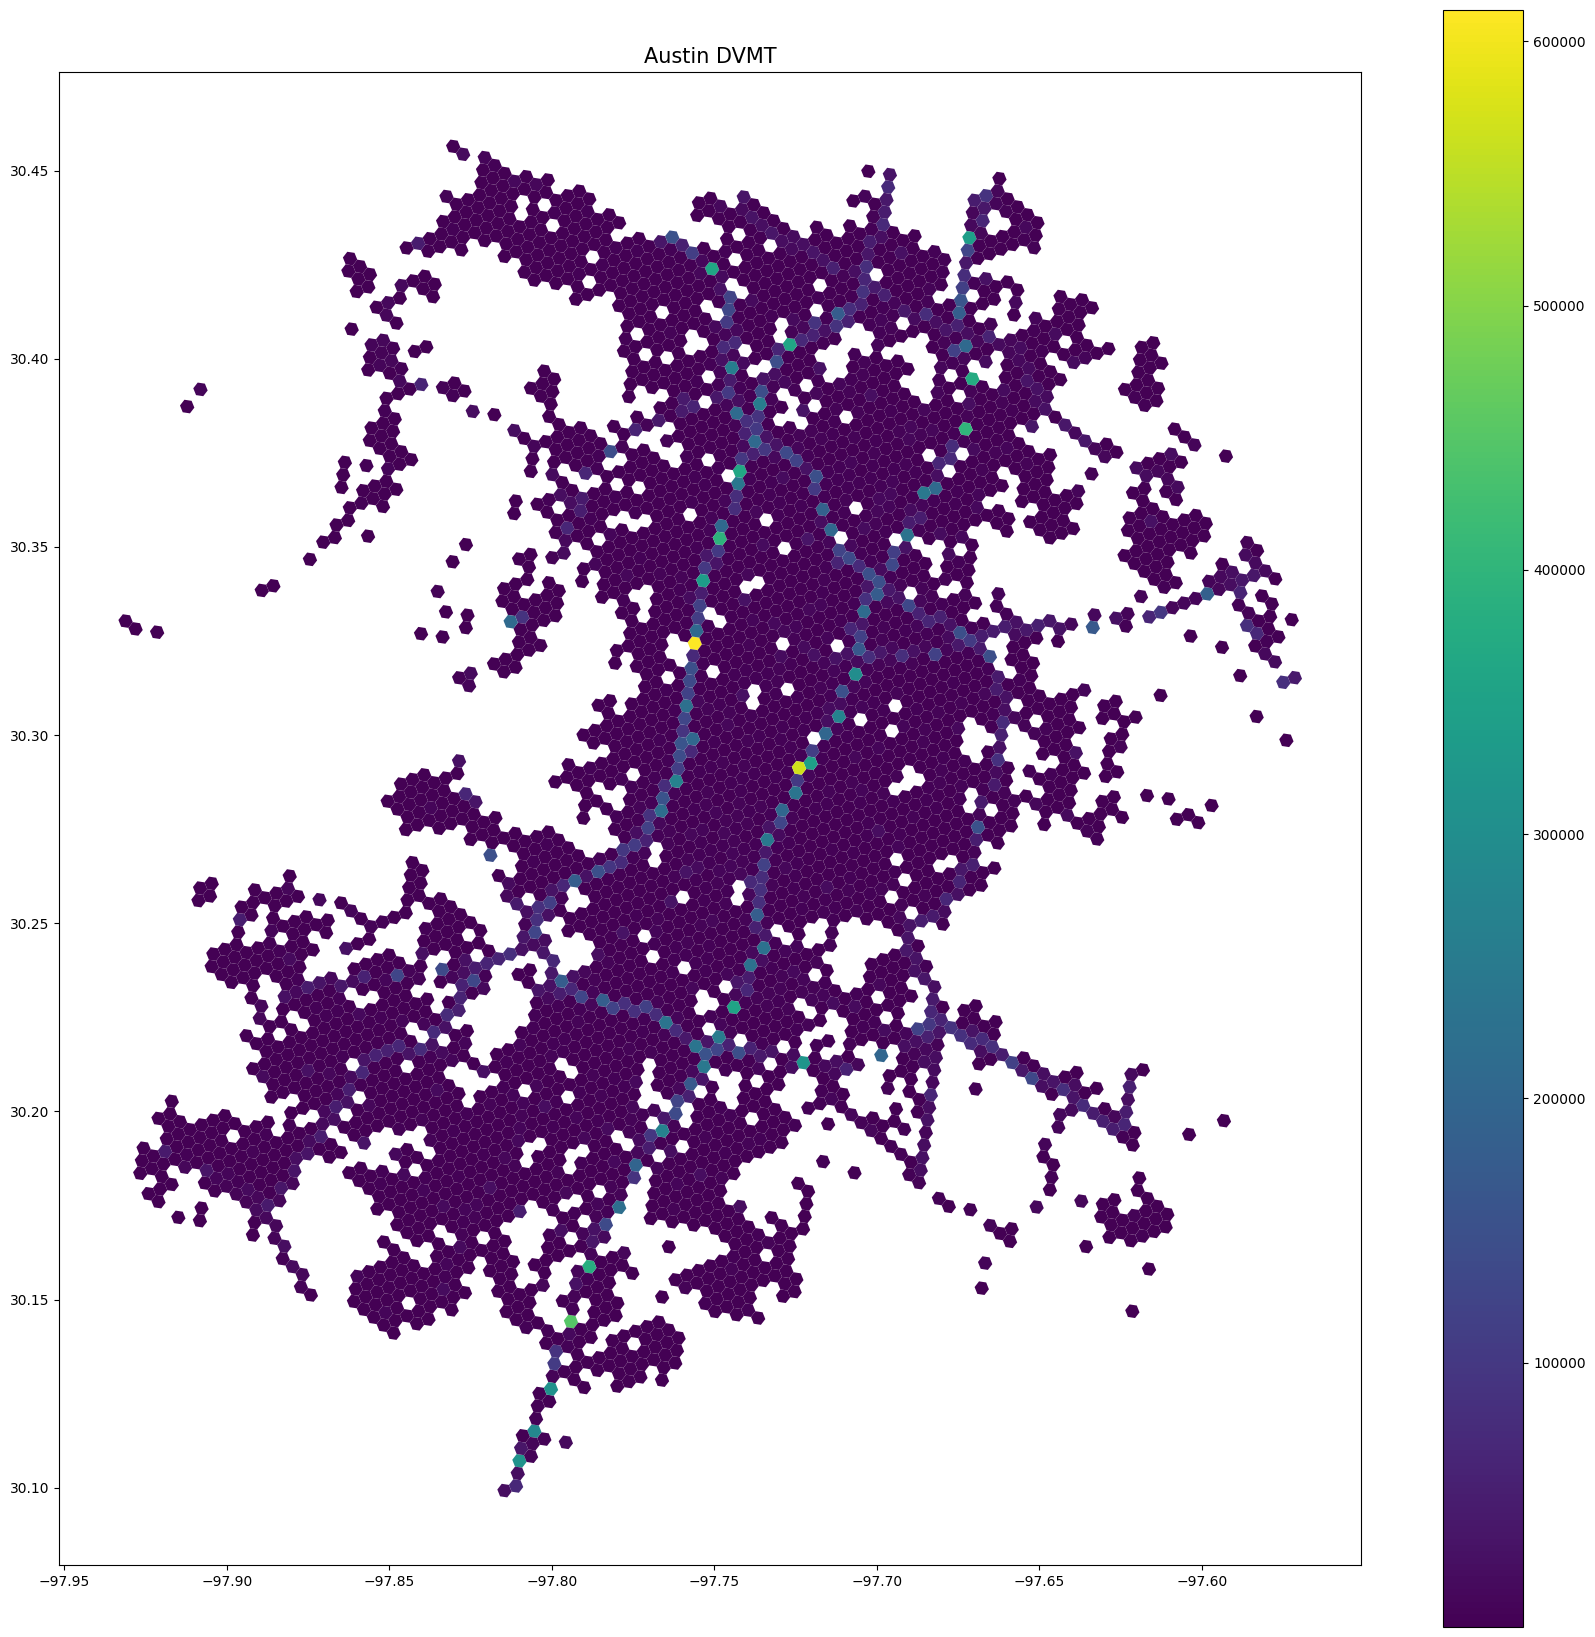

In [56]:
#hexagons = centroid_frame[centroid_frame['HWY'] == 'IH0035'].h3.geo_to_h3_aggregate(8) ### Isolating I-35

fig, ax = plt.subplots(figsize  = (21, 21))
hexagons = centroid_frame[centroid_frame['CITY'] == 2100].h3.geo_to_h3_aggregate(9)
hexagons.plot(column = 'DVMT',
                legend = True,
                #norm=mpl.colors.LogNorm(vmin = 0.01, vmax = 100),
                ax = ax)

#ax.ticklabel_format(useOffset=False)

ax.set_title("Austin DVMT", fontsize=15)